In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import dtale
import dtale.app as dtale_app
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
import pydotplus
from six import StringIO

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,...,0,78,43.0,NaN,6,0,C,6,2,7130


In [4]:
df.shape

(25000, 24)

In [5]:
df.dtypes

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [6]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [8]:
df.duplicated().sum()

0

In [9]:
df['product_wg_ton'].value_counts()

6081     21
5146     21
6057     21
6104     20
6099     20
         ..
49150     1
53141     1
43055     1
42059     1
11071     1
Name: product_wg_ton, Length: 4561, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


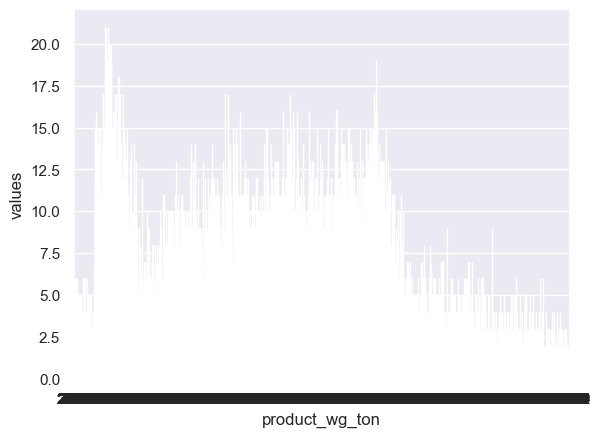

In [10]:
temp = df['product_wg_ton'].value_counts()
temp_df = pd.DataFrame({'product_wg_ton' : temp.index, 'values':temp.values})
print(sns.barplot(x='product_wg_ton', y='values', data=temp_df))

In [11]:
# wh_est_year drop
df.drop('wh_est_year', axis=1, inplace=True)

In [12]:
dtale.show(df)

In [13]:
# workers_num missing value less then 1k
#fill value by mean
df['workers_num']= df['workers_num'].fillna(df['workers_num'].mean())

In [14]:
df['workers_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: workers_num
Non-Null Count  Dtype  
--------------  -----  
25000 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [15]:
df['workers_num'].isnull().sum()

0

In [16]:
df['approved_wh_govt_certificate'].describe()

count     24092
unique        5
top           C
freq       5501
Name: approved_wh_govt_certificate, dtype: object

In [17]:
df['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='count'>

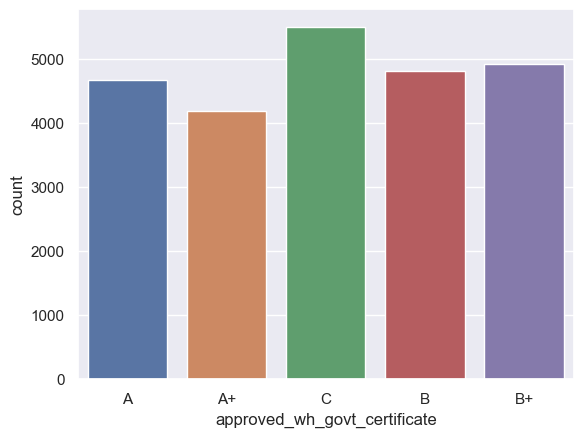

In [18]:
sns.countplot(data=df, x='approved_wh_govt_certificate')

In [19]:
#All categories similar 
# we use the ffil method to fill the null value
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna(method='ffill')


In [20]:
df['approved_wh_govt_certificate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: approved_wh_govt_certificate
Non-Null Count  Dtype 
--------------  ----- 
25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB


In [21]:
df['approved_wh_govt_certificate'].isnull().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

<AxesSubplot:xlabel='Location_type', ylabel='count'>

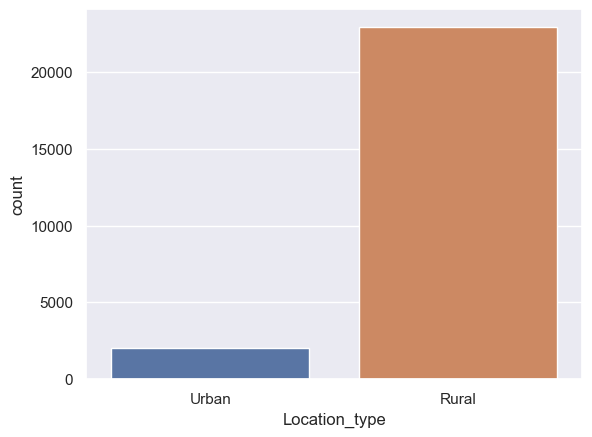

In [23]:
sns.countplot(data=df, x='Location_type')

<AxesSubplot:xlabel='Location_type', ylabel='count'>

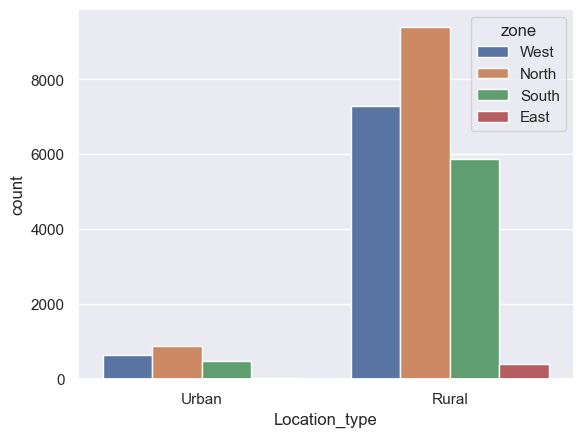

In [24]:
sns.countplot(data=df, x='Location_type', hue='zone')

<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='transport_issue_l1y'>

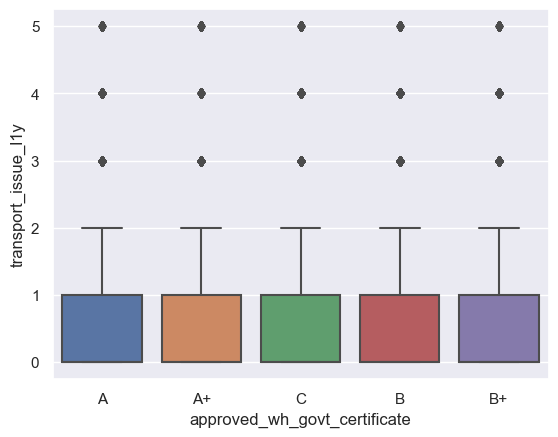

In [25]:
sns.boxplot(data = df, x='approved_wh_govt_certificate' , y='transport_issue_l1y')

In [26]:
#drop two features they are not in use
df = df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

In [27]:
cormat = df.corr()
print(cormat)

                            num_refill_req_l3m  transport_issue_l1y  \
num_refill_req_l3m                    1.000000             0.018549   
transport_issue_l1y                   0.018549             1.000000   
Competitor_in_mkt                     0.002985            -0.005826   
retail_shop_num                      -0.001186            -0.001826   
distributor_num                       0.003995             0.008993   
flood_impacted                       -0.010548            -0.009596   
flood_proof                          -0.001123             0.000022   
electric_supply                      -0.007959            -0.009299   
dist_from_hub                         0.000048             0.014336   
workers_num                          -0.013495            -0.008832   
storage_issue_reported_l3m           -0.006602            -0.144327   
temp_reg_mach                         0.260928             0.018207   
wh_breakdown_l3m                      0.000608             0.012990   
govt_c

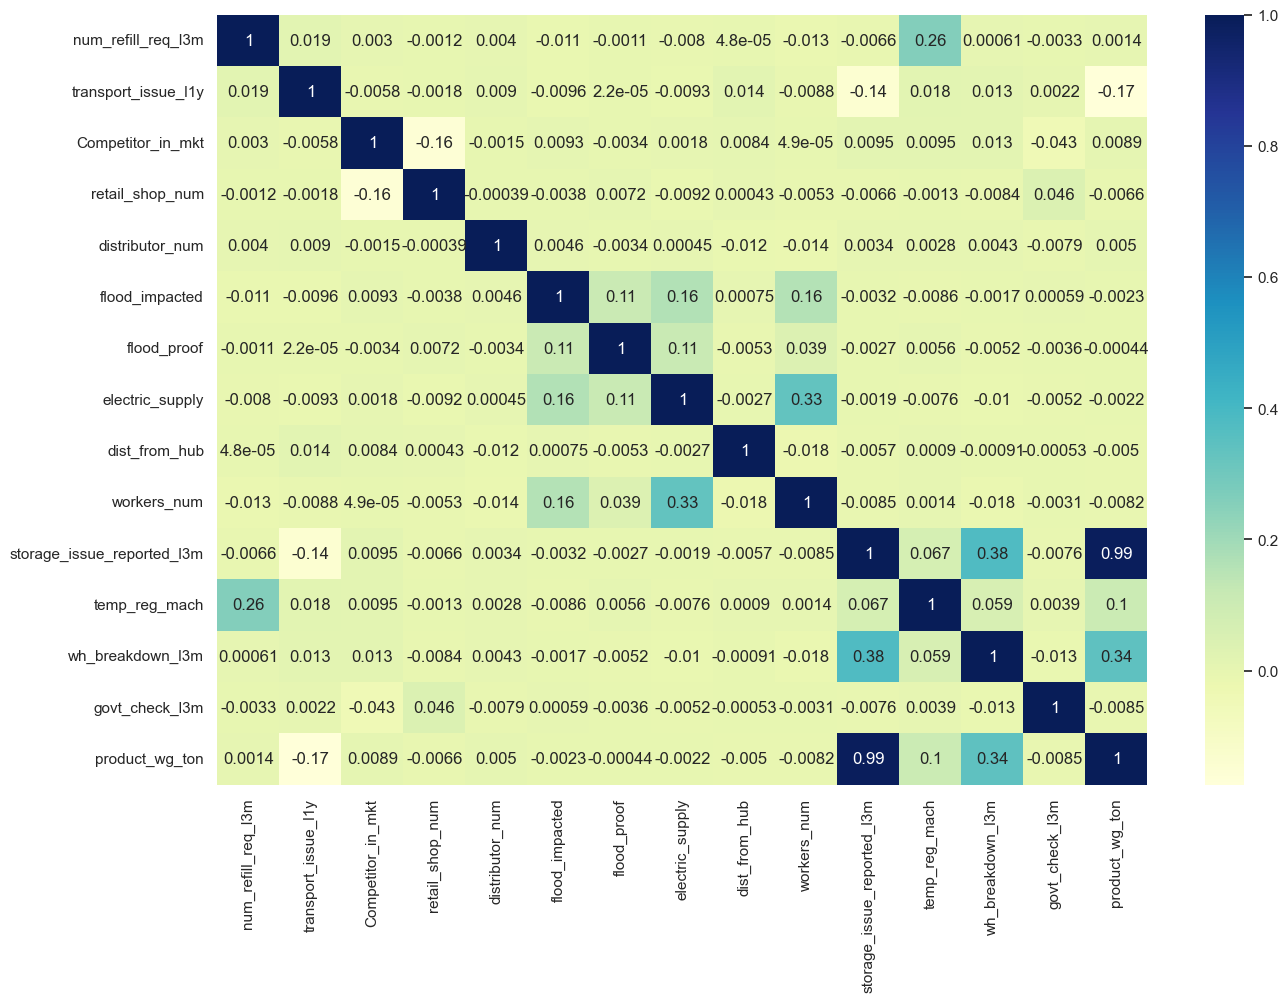

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [29]:
# Use label encoder > label into numeric value
le = LabelEncoder()
df['Location_type'] = le.fit_transform(df['Location_type'])
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])
df['zone'] = le.fit_transform(df['zone'])
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])

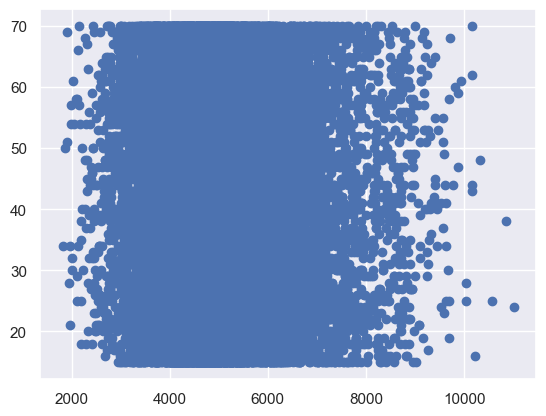

In [30]:
plt.scatter(df['retail_shop_num'], df['distributor_num'] )

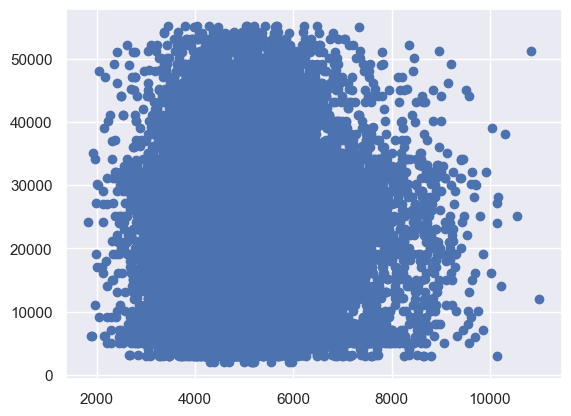

In [31]:
plt.scatter(df['retail_shop_num'], df['product_wg_ton'])

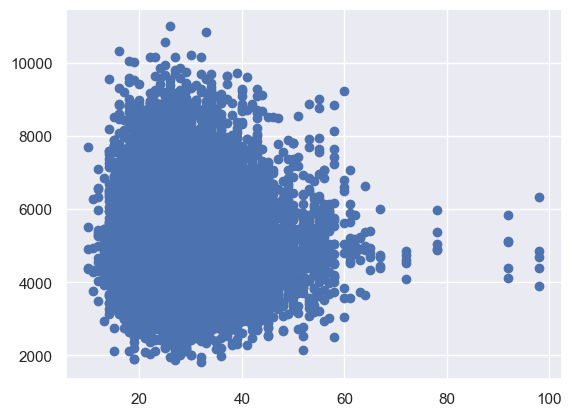

In [32]:
plt.scatter(df['workers_num'], df['retail_shop_num'] )

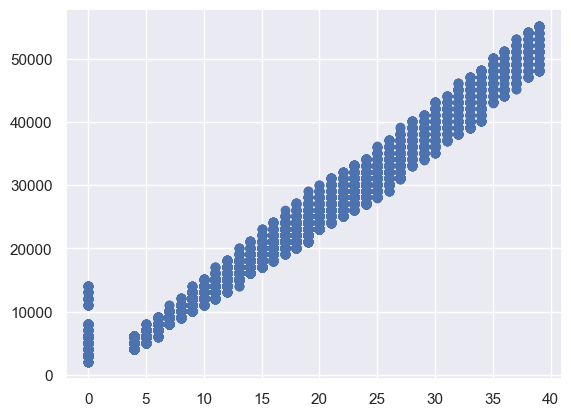

In [33]:
plt.scatter(df['storage_issue_reported_l3m'], df['product_wg_ton'])

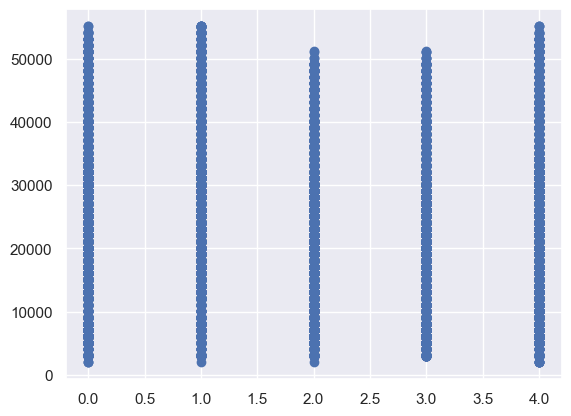

In [34]:
plt.scatter(df['approved_wh_govt_certificate'], df['product_wg_ton'])

<AxesSubplot:xlabel='num_refill_req_l3m', ylabel='Density'>

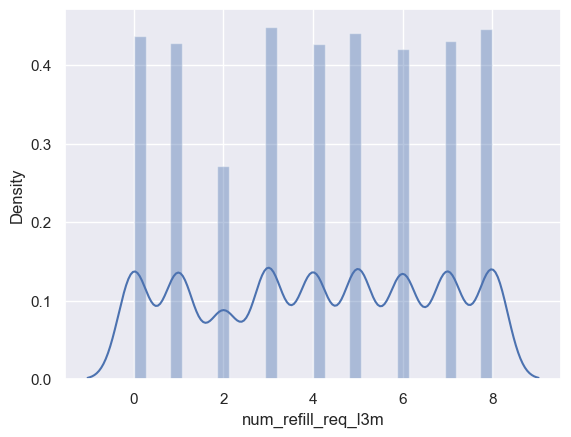

In [35]:
sns.distplot(df['num_refill_req_l3m'])

<AxesSubplot:xlabel='Competitor_in_mkt', ylabel='Density'>

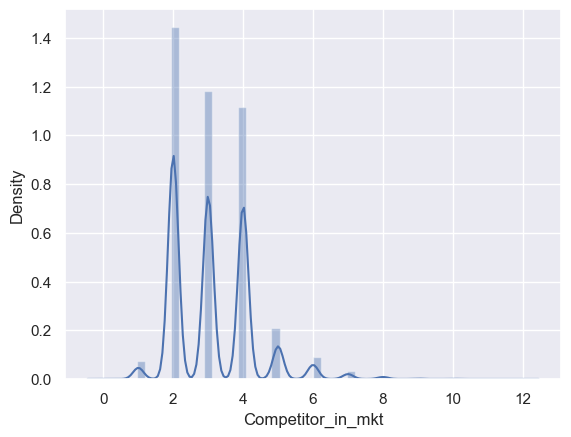

In [36]:
sns.distplot(df['Competitor_in_mkt'])

<AxesSubplot:xlabel='retail_shop_num', ylabel='Density'>

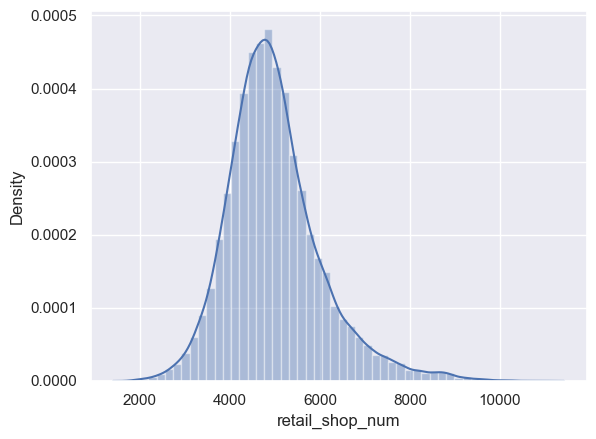

In [37]:
sns.distplot(df['retail_shop_num'])

<AxesSubplot:xlabel='distributor_num', ylabel='Density'>

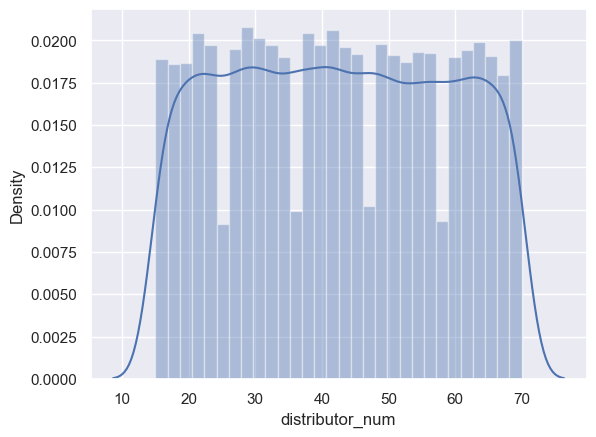

In [38]:
sns.distplot(df['distributor_num'])

<AxesSubplot:xlabel='dist_from_hub', ylabel='Density'>

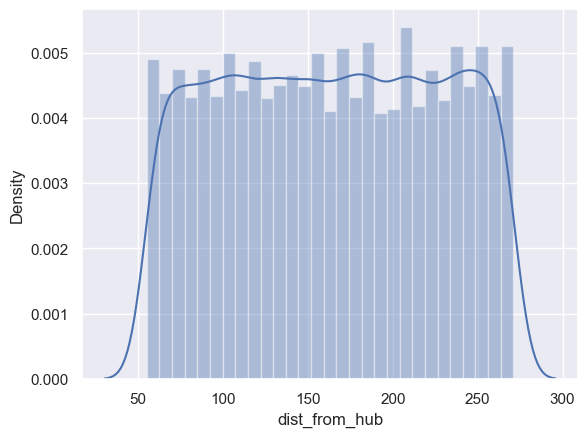

In [39]:
sns.distplot(df['dist_from_hub'])

<AxesSubplot:xlabel='workers_num', ylabel='Density'>

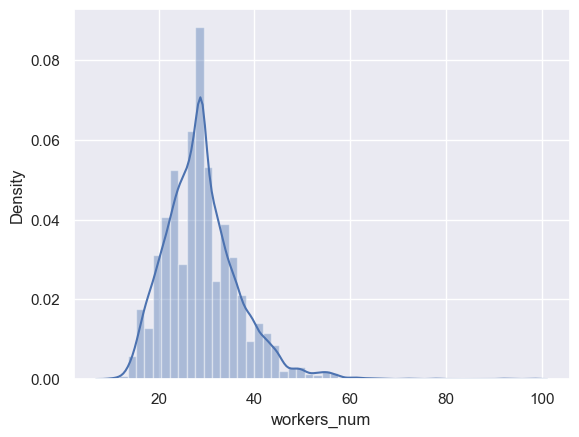

In [40]:
sns.distplot(df['workers_num'])

<AxesSubplot:xlabel='storage_issue_reported_l3m', ylabel='Density'>

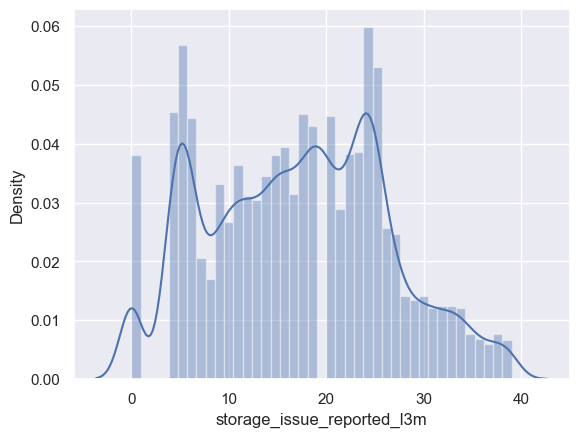

In [41]:
sns.distplot(df['storage_issue_reported_l3m'])

<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='Density'>

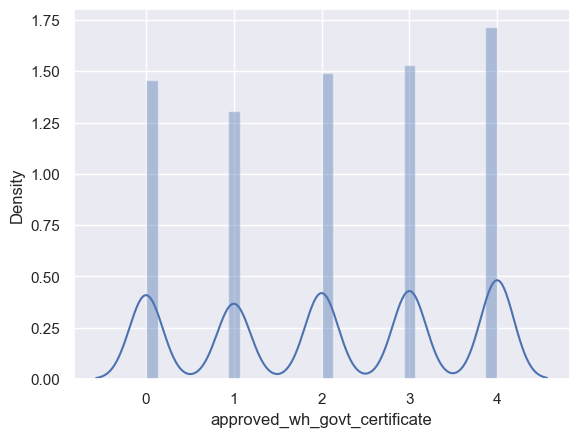

In [42]:
sns.distplot(df['approved_wh_govt_certificate'])

<AxesSubplot:xlabel='wh_breakdown_l3m', ylabel='Density'>

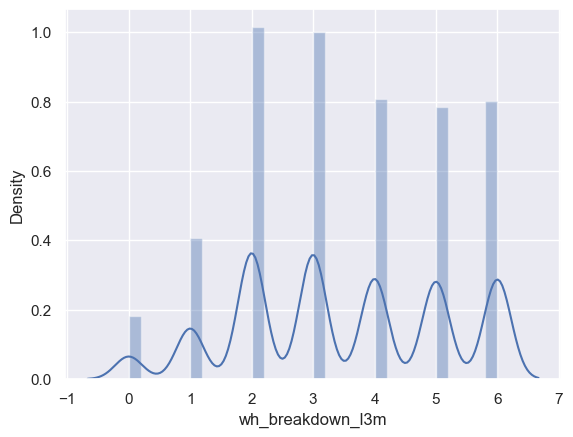

In [43]:
sns.distplot(df['wh_breakdown_l3m'])

<AxesSubplot:xlabel='govt_check_l3m', ylabel='Density'>

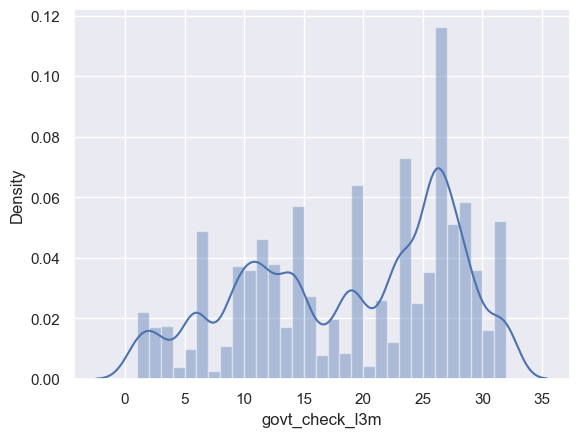

In [44]:
sns.distplot(df['govt_check_l3m'])

<AxesSubplot:xlabel='product_wg_ton', ylabel='Density'>

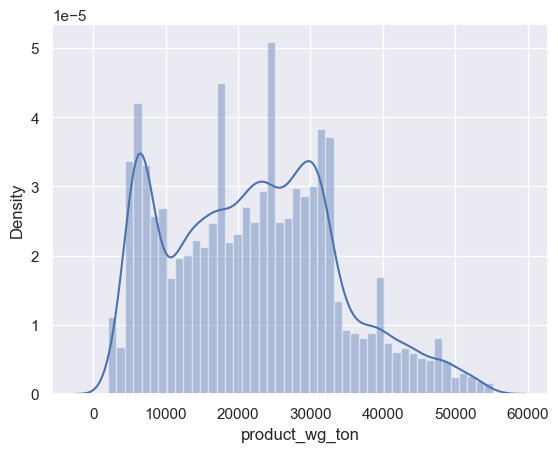

In [45]:
sns.distplot(df['product_wg_ton'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int32  
 1   WH_capacity_size              25000 non-null  int32  
 2   zone                          25000 non-null  int32  
 3   WH_regional_zone              25000 non-null  int32  
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  int32  
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [47]:
x = df.drop(['product_wg_ton'], axis=1)
y = df[['product_wg_ton']]

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=35,max_depth=40,max_leaf_nodes=330)
dt=dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
y_pred_train=dtr.predict(x_train)
print("***************************************************Report MSE & RMSE**************************************************")
y_pred = dt.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
dt_train=dt.score(x_train, y_train)
print("Training score: ",dt_train)
dt_test = dt.score(x_test, y_test)
print("Testing score: ",dt_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 992372.1558285716
RMSE : 996.1787770418379
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9921512593795555
Cross Validation Testing Score 0.9894941584021526
***************************************************Report Training And Testing Score**********************************
Training score:  0.9947650901939747
Testing score:  0.99265900886181


In [51]:
# Model Accuracy
print ('Model Accuracy is: ', (dt.score(x_test, y_test))*100)

Model Accuracy is:  99.265900886181


In [52]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lmodel = lm.fit(x_train, y_train)
print("***************************************************Report*************************************************************")
y_pred = lmodel.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(lmodel, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(lmodel, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
lmodel_train=lmodel.score(x_train, y_train)
print("Training score: ",lmodel_train)
lmodel_test = lmodel.score(x_test, y_test)
print("Testing score: ",lmodel_test)

***************************************************Report*************************************************************
MSE : 2889615.184270491
RMSE : 1699.8868151351992
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9776728886809835
Cross Validation Testing Score 0.9785016144772142
***************************************************Report Training And Testing Score**********************************
Training score:  0.9777594759826853
Testing score:  0.9786243101079378


In [53]:
# Model Accuracy
print ('Model Accuracy is: ', (lmodel.score(x_test, y_test))*100)

Model Accuracy is:  97.86243101079378


In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
print("***************************************************Report*************************************************************")
y_pred = rfr.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(rfr, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(rfr, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
rfr_train=rfr.score(x_train, y_train)
print("Training score: ",rfr_train)
rfr_test = rfr.score(x_test, y_test)
print("Testing score: ",rfr_test)

***************************************************Report*************************************************************
MSE : 890181.94655372
RMSE : 943.4945397582967
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9930429085923741
Cross Validation Testing Score 0.9924410020462151
***************************************************Report Training And Testing Score**********************************
Training score:  0.9990422006264371
Testing score:  0.9934149525028024


In [55]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb1=xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)
print("***************************************************Report*************************************************************")
y_pred = xgb1.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(xgb1, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(xgb1, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
xgb1_train=xgb1.score(x_train, y_train)
print("Training score: ",xgb1_train)
xgb1_test = xgb1.score(x_test, y_test)
print("Testing score: ",xgb1_test)

***************************************************Report*************************************************************
MSE : 906556.6720959495
RMSE : 952.132696684632
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9930881073011996
Cross Validation Testing Score 0.9925059470299405
***************************************************Report Training And Testing Score**********************************
Training score:  0.9967685392662823
Testing score:  0.9932938218217471


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(x_train, y_train)
print("***************************************************Report*************************************************************")
y_pred = gbm.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(gbm, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(gbm, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
gbm_train=gbm.score(x_train, y_train)
print("Training score: ",gbm_train)
gbm_test = gbm.score(x_test, y_test)
print("Testing score: ",gbm_test)

***************************************************Report*************************************************************
MSE : 852791.6758805811
RMSE : 923.4672034677686
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9934737327581263
Cross Validation Testing Score 0.9933166514610962
***************************************************Report Training And Testing Score**********************************
Training score:  0.9936511037119374
Testing score:  0.9936915439448878


In [57]:
from sklearn.ensemble import AdaBoostRegressor
abdc=AdaBoostRegressor(random_state=70, n_estimators=20, learning_rate=1)
abdc1=abdc.fit(x_train,y_train)
y_pred=abdc.predict(x_test)
y_pred_train=abdc.predict(x_train)
print("***************************************************Report MSE & RMSE**************************************************")
y_pred = abdc1.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(abdc1, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(abdc1, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
abdc1_train=abdc1.score(x_train, y_train)
print("Training score: ",abdc1_train)
abdc1_test = abdc1.score(x_test, y_test)
print("Testing score: ",abdc1_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 3384027.4490829706
RMSE : 1839.5726267486616
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9775844032433756
Cross Validation Testing Score 0.9782738751037885
***************************************************Report Training And Testing Score**********************************
Training score:  0.974803726259369
Testing score:  0.9749669361748992


In [58]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
NB=nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
y_pred_train=nb.predict(x_train)

print("***************************************************Report MSE & RMSE**************************************************")
y_pred = NB.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(NB, x_train, y_train, cv=8, scoring='r2').mean()
cv_score2 = cross_val_score(NB, x_test, y_test, cv=8, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
NB_train=abdc1.score(x_train, y_train)
print("Training score: ",NB_train)
NB_test = abdc1.score(x_test, y_test)
print("Testing score: ",NB_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 18738587.5604
RMSE : 4328.809023322697
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.8698812644586006
Cross Validation Testing Score 0.774153781302544
***************************************************Report Training And Testing Score**********************************
Training score:  0.974803726259369
Testing score:  0.9749669361748992


In [59]:
from sklearn.svm import SVR
svc=SVR()
SVM=svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_pred_train=svc.predict(x_train)
print("***************************************************Report MSE & RMSE**************************************************")
y_pred = SVM.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(SVM, x_train, y_train, cv=8, scoring='r2').mean()
cv_score2 = cross_val_score(SVM, x_test, y_test, cv=8, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
SVM_train=SVM.score(x_train, y_train)
print("Training score: ",SVM_train)
SVM_test = SVM.score(x_test, y_test)
print("Testing score: ",SVM_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 128613281.3599301
RMSE : 11340.779574611708
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.04260437519921577
Cross Validation Testing Score 0.009452788526143216
***************************************************Report Training And Testing Score**********************************
Training score:  0.049018066825596396
Testing score:  0.048593863530494885
